# Harris Corner Detection

### Import resources and display image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Download Images

In [ ]:
!git clone https://github.com/adawolfs/CNN_en_espanol

### rootPath Configuration

In [2]:
route = '../'
# Usar esta linea en colab
# route = './CNN_en_espanol/'

### Leer imagen e imprimir

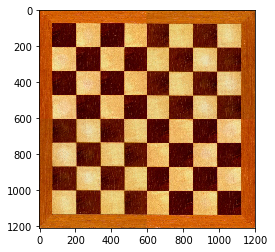

In [3]:
# Read in the image
image = cv2.imread(route + 'images/chess_board_1.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect corners

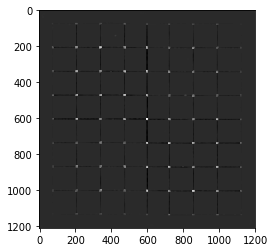

In [4]:
# Convertir en escala de grises
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detectar esquinas
dst = cv2.cornerHarris(gray, 10, 5, 0.05)

# Dilate los puntos para hacerlos visibles
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


### Extract and display strong corners

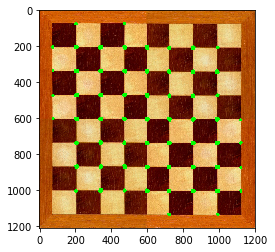

In [5]:
# Definicion del threshold
thresh = 0.2 * dst.max()

# hacer una copia de la imagen para imprimir los puntos
corner_image = np.copy(image_copy)

# Iterar sobre cada uno de cada esquina y dibularlos sobre la imagen, solo si pasan el threshold.
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 10)

plt.imshow(corner_image)